In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import louvain
import numpy as np
from networkx.algorithms import community
%matplotlib inline

In [2]:
G = nx.Graph()
G.add_edge(1,4)  # default edge data=1
G.add_edge(2,4)  # default edge data=1
G.add_edge(3,4)  # default edge data=1
G.add_edge(1,12)  # default edge data=1
G.add_edge(2,12)  # default edge data=1
G.add_edge(3,12)  # default edge data=1
G.add_edge(1,2)  # default edge data=1
G.add_edge(1,3)  # default edge data=1
G.add_edge(2,3)  # default edge data=1


G.add_edge(4,5)  # default edge data=1
G.add_edge(4,6)  # default edge data=1
G.add_edge(4,7)  # default edge data=1
G.add_edge(12,5)  # default edge data=1
G.add_edge(12,6)  # default edge data=1
G.add_edge(12,7)  # default edge data=1
G.add_edge(5,6)  # default edge data=1
G.add_edge(5,7)  # default edge data=1
G.add_edge(6,7)  # default edge data=1
G.add_edge(10,11)  # default edge data=1


/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


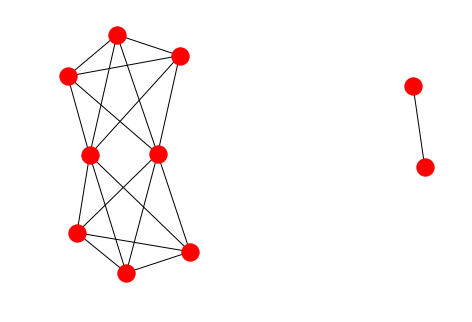

In [3]:
nx.draw(G)

In [4]:
nx.eigenvector_centrality(G)

{1: 0.3262607265371391,
 2: 0.3262607265371391,
 3: 0.3262607265371391,
 4: 0.4250433095090128,
 5: 0.3262607265371391,
 6: 0.3262607265371391,
 7: 0.3262607265371391,
 10: 1.932077383016172e-14,
 11: 1.932077383016172e-14,
 12: 0.4250433095090128}

In [6]:
F = nx.Graph()
for i in range(5):
    for j in range(5):
        F.add_edge(i,j)

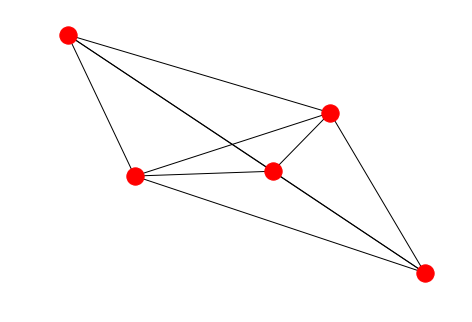

In [7]:
nx.draw(F)

In [8]:
nx.edge_betweenness_centrality(G)

{(1, 2): 0.022222222222222223,
 (1, 3): 0.022222222222222223,
 (1, 4): 0.05925925925925927,
 (1, 12): 0.05925925925925926,
 (2, 3): 0.022222222222222223,
 (2, 4): 0.05925925925925927,
 (2, 12): 0.05925925925925926,
 (3, 4): 0.05925925925925927,
 (3, 12): 0.05925925925925926,
 (4, 5): 0.05925925925925927,
 (4, 6): 0.05925925925925927,
 (4, 7): 0.05925925925925927,
 (5, 6): 0.022222222222222223,
 (5, 7): 0.022222222222222223,
 (5, 12): 0.05925925925925927,
 (6, 7): 0.022222222222222223,
 (6, 12): 0.05925925925925927,
 (7, 12): 0.05925925925925927,
 (10, 11): 0.022222222222222223}

In [9]:
nx.estrada_index(G)

113.05871375065728

In [10]:
T = nx.barbell_graph(10,1)

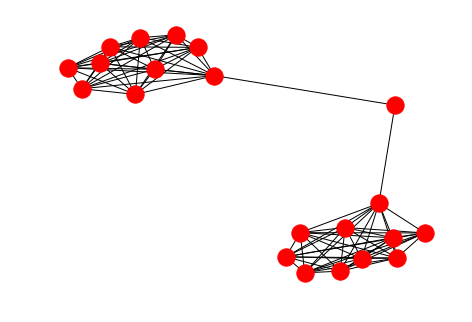

In [11]:
nx.draw(T)

In [12]:
nx.eigenvector_centrality(T)

{0: 0.2228123934215467,
 1: 0.2228123934215467,
 2: 0.2228123934215467,
 3: 0.2228123934215467,
 4: 0.2228123934215467,
 5: 0.2228123934215467,
 6: 0.2228123934215467,
 7: 0.2228123934215467,
 8: 0.2228123934215467,
 9: 0.22785138822196974,
 10: 0.05050704753156758,
 11: 0.2278513882219698,
 12: 0.22281239342154677,
 13: 0.22281239342154677,
 14: 0.22281239342154677,
 15: 0.22281239342154677,
 16: 0.22281239342154677,
 17: 0.22281239342154677,
 18: 0.22281239342154677,
 19: 0.22281239342154677,
 20: 0.22281239342154677}

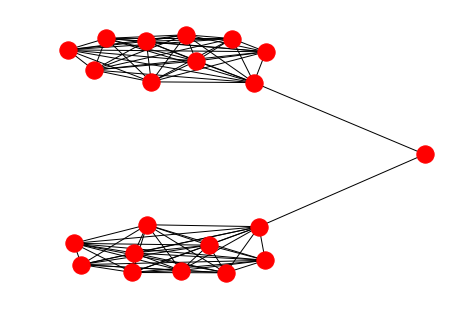

In [13]:
#T.remove_node(10)
nx.draw(T)

In [14]:
for c in nx.find_cliques(G):
    print c

[12, 1, 2, 3]
[12, 5, 6, 7]
[10, 11]
[4, 1, 2, 3]
[4, 5, 6, 7]


In [15]:
set([10,20,30]) - set([10])

{20, 30}

In [19]:
def compute_Q(G, c,num_components):
    edge_count = G.number_of_edges()

    # Create the matrix D
    d = np.zeros((num_components, num_components))

    i = 0
    j = 0
    for comm1 in c:
        for comm2 in c:
            ratio = 0
            if comm1 == comm2:
                ratio/=2
            else:
                edges_between_communities = 0
                for node in comm1:
                    for nbr in nx.neighbors(G, node):
                        if nbr in comm2:
                            edges_between_communities +=1
                ratio = edges_between_communities/float(edge_count)

            d[i][j] = ratio
            d[j][i] = ratio
            j+=1
        j = 0
        i+= 1
        
    # Compute Q value
    tr = np.trace(d)
    d2 = np.matmul(d,d)
    sumd2 = np.sum(d2)
    q = tr-sumd2
    return q

In [20]:
# G.remove_node(4)
compute_Q(G,[[1,2,4],[5,6,7]])

TypeError: compute_Q() takes exactly 3 arguments (2 given)

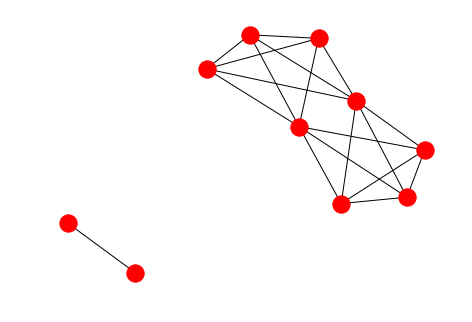

In [18]:
nx.draw(G)

In [21]:
G.remove_node(4)
for cc in nx.connected_components(G):
    print cc

set([1, 2, 3, 5, 6, 7, 12])
set([10, 11])


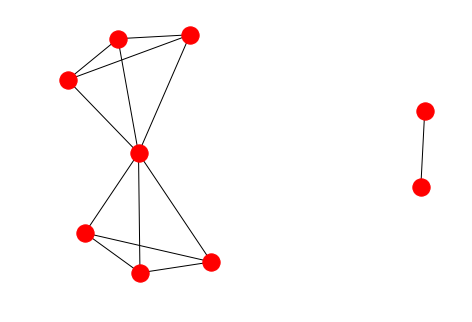

Q:

NameError: name 'connected_components' is not defined

In [22]:
while (G.number_of_nodes() != 0):
    nx.draw(G)
    plt.show()
    connected_comps = nx.connected_components(G)
    num_components = len([a for a in connected_comps])
    
    all_flows = {}
    for g in connected_comps:
        flows = nx.approximate_current_flow_betweenness_centrality(G.subgraph(g))
        all_flows.update(flows)
        num_components+= 1
    
    print "Q:",compute_Q(G, connected_components, num_components)
    
    
    bottleneck_node = max(all_flows, key=all_flows.get)
    G.remove_node(bottleneck_node)
    
    

In [23]:
G.number_of_nodes()

9

In [24]:
x = {'a': 1, 'b': 2}
y = {'b': 3, 'c': 4}
x.update(y)
x

{'a': 1, 'b': 3, 'c': 4}

In [25]:
for x in nx.k_clique_communities(G,2):
    print x

frozenset([1, 2, 3, 5, 6, 7, 12])
frozenset([10, 11])


In [26]:
x = np.array([[1,2],[3,4]])
np.trace(x)

5

In [27]:
np.zeros((10,10))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [28]:
louvain.VertexPartition.MutableVertexPartition(G.)

SyntaxError: invalid syntax (<ipython-input-28-5bc42af55760>, line 1)

In [ ]:
community.best_partition(G)

In [ ]:
import community
import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [ ]:
communities_generator = nx.find_cliques(G)

In [ ]:
for x in communities_generator:
    print x
    #nx.draw(G.subgraph(x))
    #plt.show()

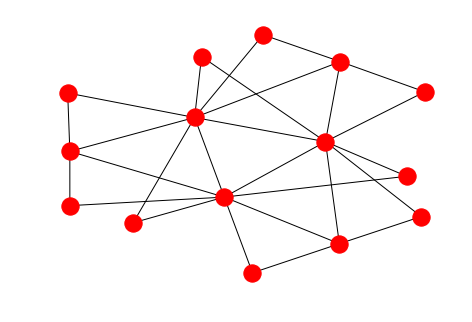

In [32]:
A = nx.dorogovtsev_goltsev_mendes_graph(3)
nx.draw(A)

In [33]:
communities_generator = nx.find_cliques(A)
for x in communities_generator:
    print x
    #nx.draw(G.subgraph(x))
    #plt.show()

[0, 8, 3]
[0, 1, 2]
[0, 1, 3]
[0, 1, 6]
[0, 4, 9]
[0, 4, 2]
[0, 7, 2]
[5, 1, 2]
[5, 1, 12]
[5, 14, 2]
[10, 1, 2]
[11, 1, 3]
[13, 2, 4]


# Conducting a test of the algorithm on a binary image

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((100, 100))
x1, y1, x2, y2 = 30, 30, 40, 40
r1, r2 = 10, 5
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
#mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = mask_circle1#np.logical_or(mask_circle1, mask_circle2)

In [87]:
node_id = 0
T = nx.Graph()
for i in range(1,image.shape[0]-1):
    for j in range(1,image.shape[1]-1):
        node_id  = i*image.shape[1] + j
        
        # add neighbor nodes
        if (image[i,j]):
            for ii in range(i-1,i+2):
                for jj in range(j-1,j+2):
                    if ii != i or jj != i:
                        if (image[ii,jj]):
                            nbr_node_id = ii*image.shape[1] + jj
                            T.add_edge(node_id, nbr_node_id)
            
        

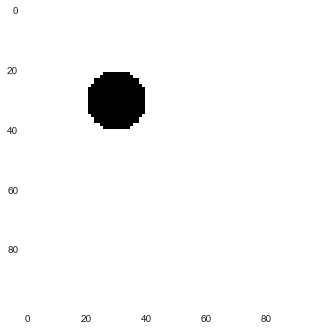

In [88]:
plt.imshow(image)

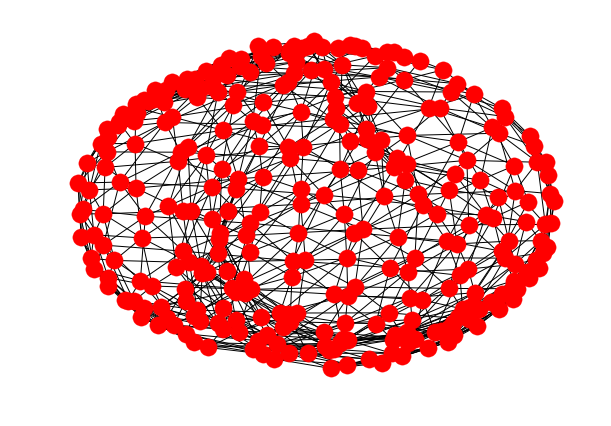

In [92]:
nx.draw(T)

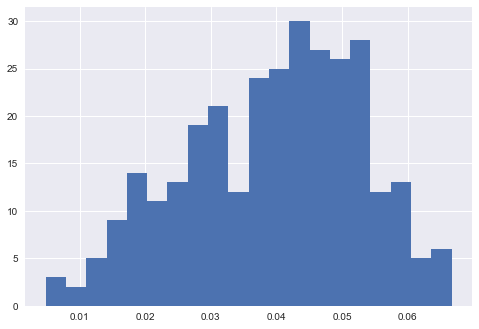

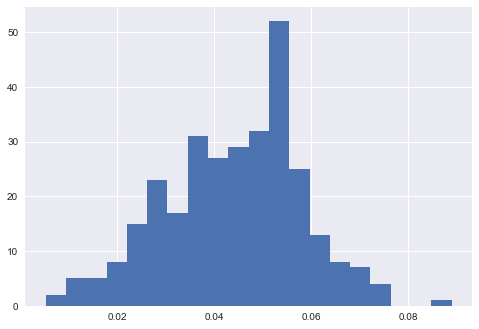

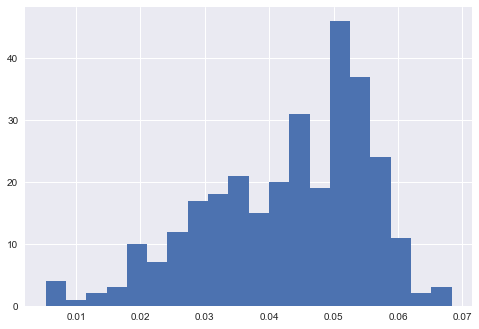

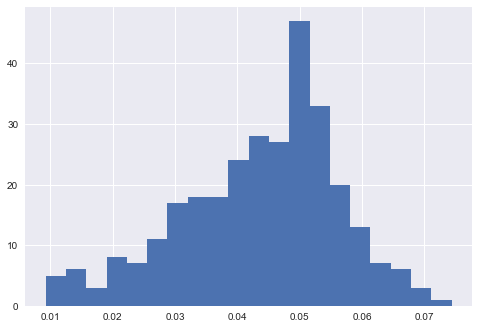

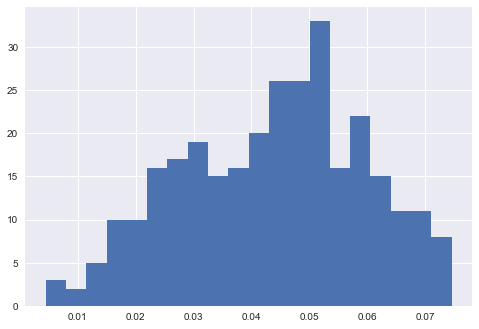

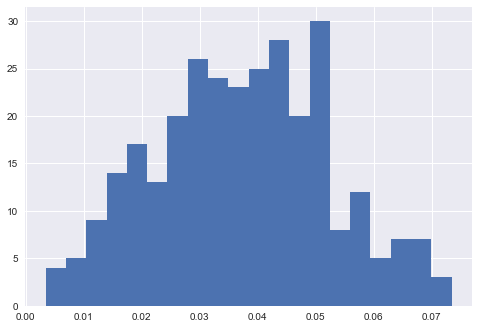

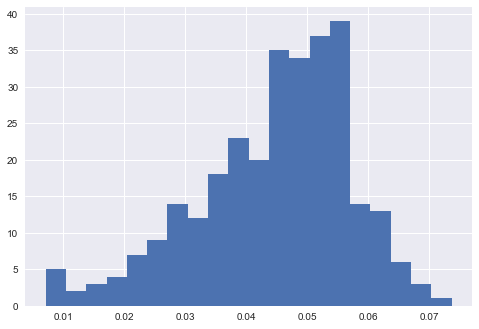

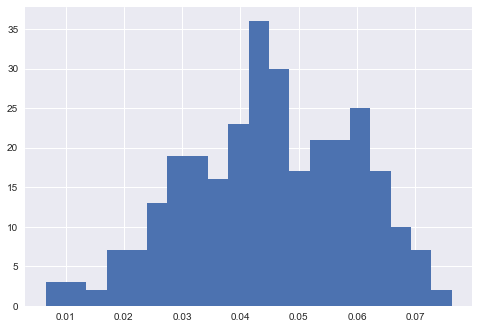

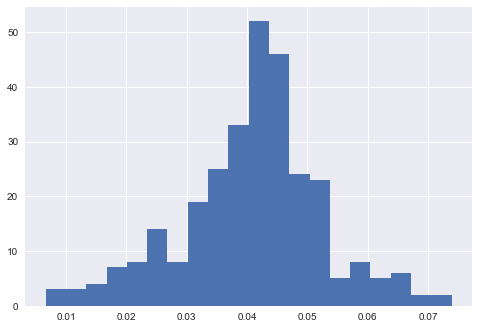

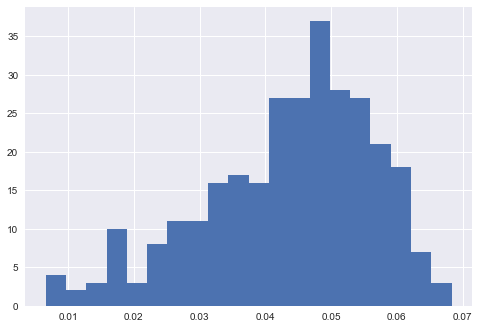

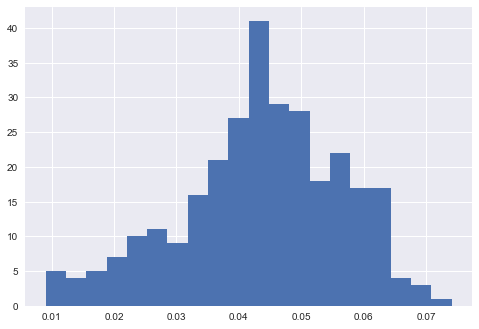

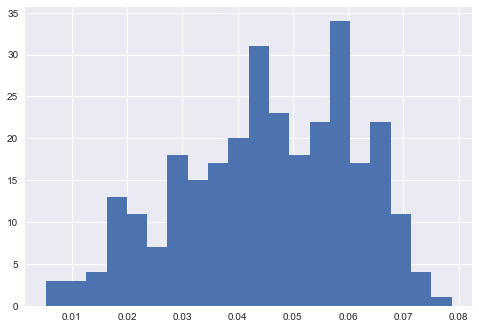

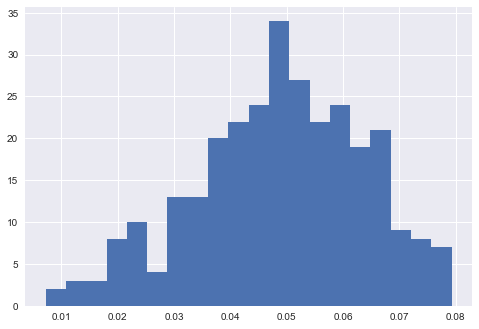

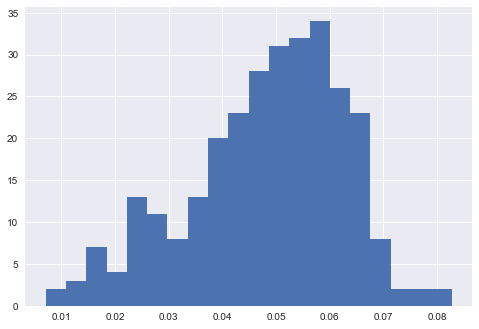

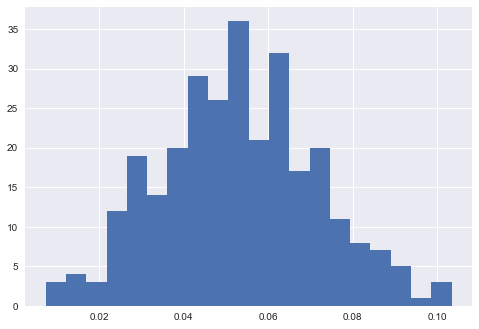

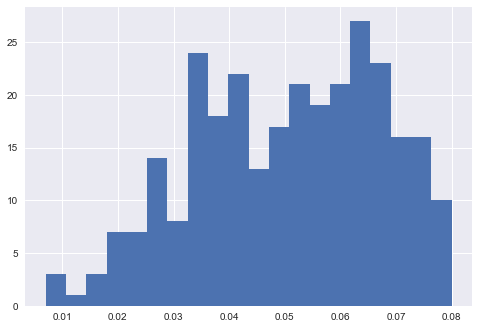

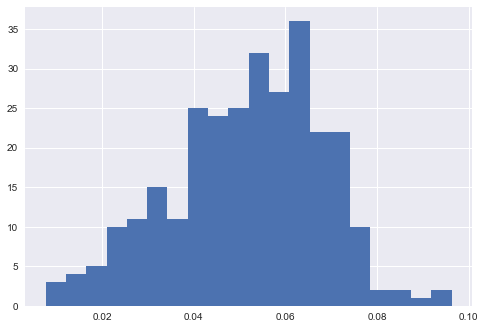

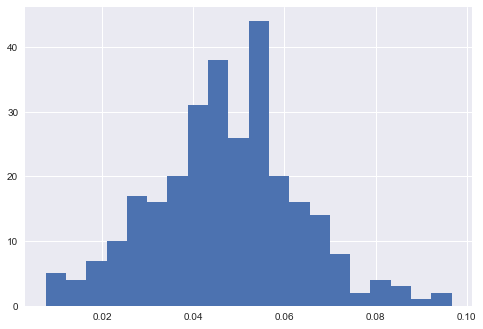

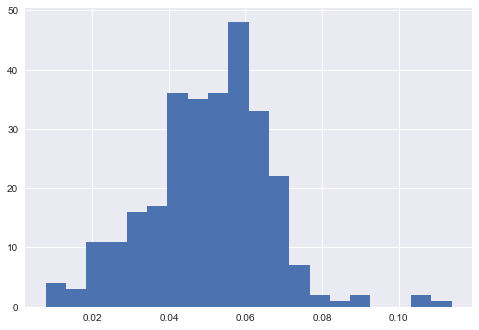

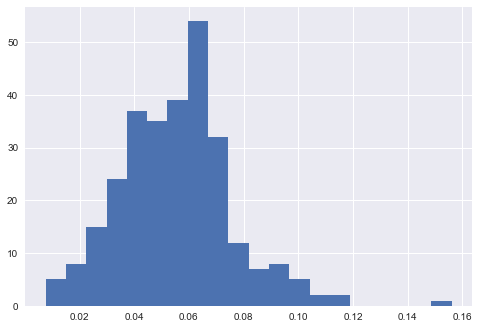

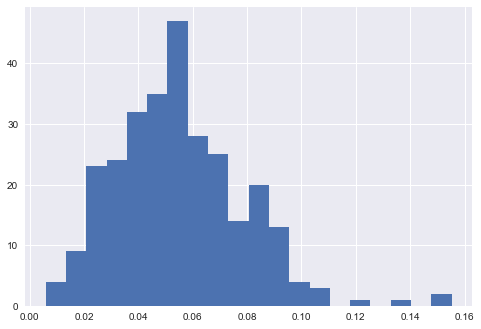

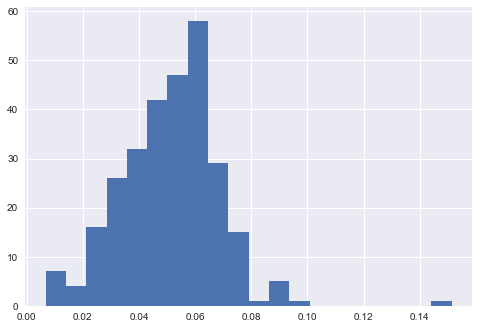

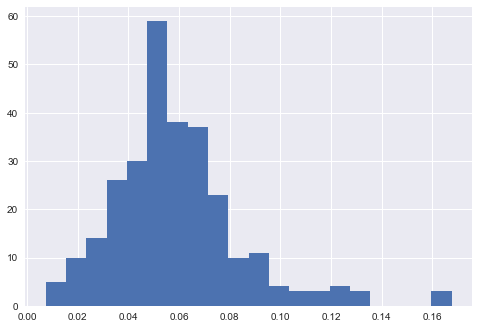

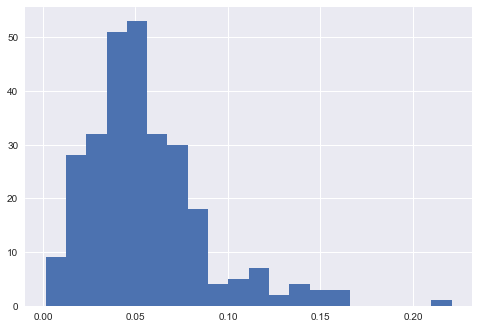

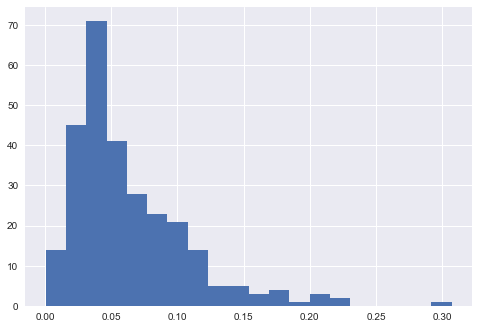

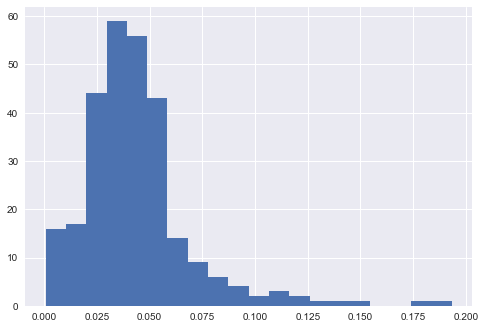

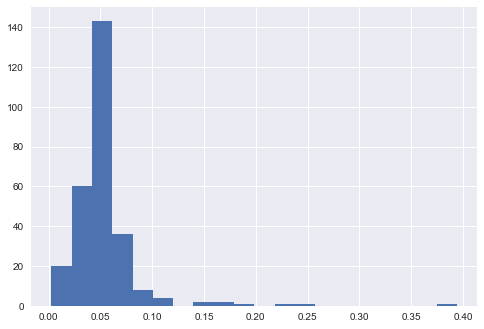

NetworkXError: Graph not connected.

In [93]:
ambig_nodes = []
while True:
    #nx.draw(T)
    #plt.show()
    flows = nx.approximate_current_flow_betweenness_centrality(T)
    plt.hist(flows.values(),bins=20)
    plt.show()
    max_node = max(flows, key=flows.get)
    T.remove_node(max_node)
    ambig_nodes.append(max_node)


In [94]:
ccs = nx.connected_components(T)
cc1 = ccs.next()
cc2 = ccs.next()
if len(cc1) > len(cc2):
    cc1.update(set(ambig_nodes))
else:
    cc2.update(set(ambig_nodes))

In [95]:
image2 = np.zeros((image.shape[0],image.shape[1]))
for i in range(1,image.shape[0]-1):
    for j in range(1,image.shape[1]-1):
        node_id  = i*image.shape[1] + j
        if node_id in cc1:
            image2[i,j] = 1
        if node_id in cc2:
             image2[i,j] = 2
#         if node_id in ambig_nodes:
#             image2[i,j] = 3
            
            

In [96]:
image2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

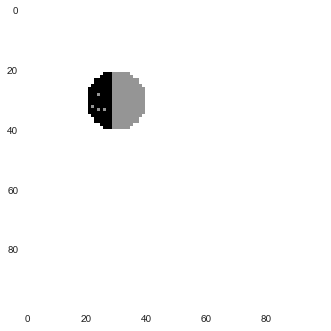

In [97]:
plt.imshow(image2)

(array([  42.,  106.,  182.,   20.,    7.,    5.,    2.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    1.]),
 array([ 0.00313241,  0.0229708 ,  0.0428092 ,  0.06264759,  0.08248599,
         0.10232438,  0.12216277,  0.14200117,  0.16183956,  0.18167796,
         0.20151635,  0.22135475,  0.24119314,  0.26103154,  0.28086993,
         0.30070832,  0.32054672,  0.34038511,  0.36022351,  0.3800619 ,
         0.3999003 ]),
 <a list of 20 Patch objects>)

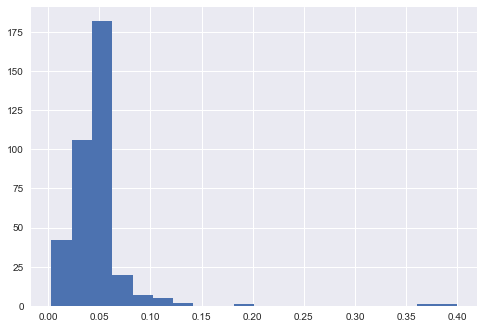

In [81]:
plt.hist(flows.values(),bins=20)

In [82]:
import data_utils as du
import models

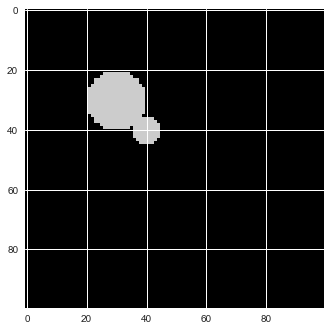

In [85]:
plt.imshow(models.watershed_seg(image), cmap="spectral")

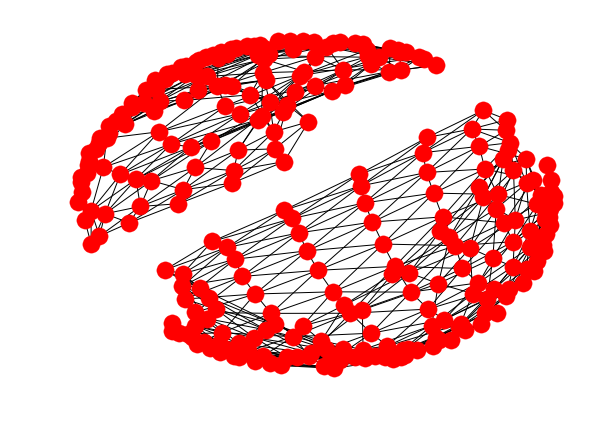

In [98]:
nx.draw(T)